## Introduction to Linear Regression


In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as seabornInstance

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings("ignore")

In [24]:
dataset = pd.read_csv('winequality.csv')

In [25]:
dataset.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


In [26]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [27]:
dataset.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [33]:
X = dataset.drop("alcohol",axis=1)
y = dataset["alcohol"]

In [35]:
from sklearn.preprocessing import MinMaxScaler

In [37]:
scaler = MinMaxScaler()
X_columns = X.columns
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(data=X_scaled,columns=X_columns)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle=True, random_state=1)

In [41]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1279, 11)
(320, 11)
(1279,)
(320,)


In [43]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [45]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
fixed acidity,5.632935
volatile acidity,0.757352
citric acid,0.757244
residual sugar,3.902417
chlorides,-0.534935
free sulfur dioxide,-0.281836
total sulfur dioxide,-0.273072
density,-7.865034
pH,4.703989
sulphates,1.562447


In [47]:
y_pred = np.round(regressor.predict(X_test),1)
y_pred_train = np.round(regressor.predict(X_train),1)

In [49]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)

In [51]:
df1 = df1.sort_values(by="Actual")

In [53]:
df1.head()

,Actual,Predicted
669,9.2,9.4
60,9.2,10.2
181,9.3,9.8
790,9.7,10.0
194,9.7,9.9


In [55]:
import seaborn as sns

<Axes: xlabel='Actual', ylabel='Predicted'>

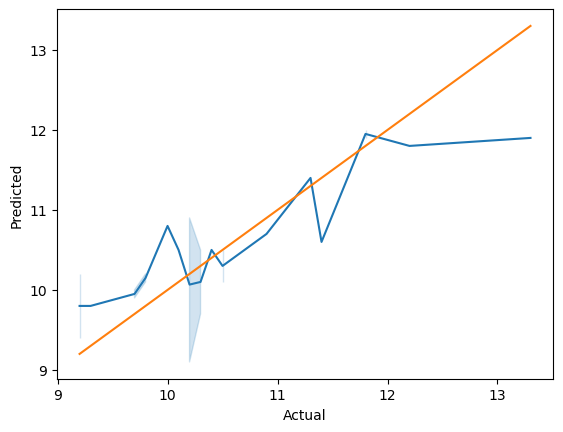

In [57]:
sns.lineplot(data=df1, x="Actual", y="Predicted")
sns.lineplot(data=df1, x="Actual", y="Actual")

In [65]:

from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

In [67]:
print("MAE:",round(mean_absolute_error(y_train,y_pred_train),2))
print("MAPE:",round(mean_absolute_percentage_error(y_train,y_pred_train)*100,2),"%")
print("RMSE:",round(np.sqrt(mean_squared_error(y_train,y_pred_train)),2))
print("R**2:",round(r2_score(y_train,y_pred_train),2))

MAE: 0.46
MAPE: 4.35 %
RMSE: 0.6
R**2: 0.7


In [69]:
print("MAE:",round(mean_absolute_error(y_test,y_pred),2))
print("MAPE:",round(mean_absolute_percentage_error(y_test,y_pred)*100,2),"%")
print("RMSE:",round(np.sqrt(mean_squared_error(y_test,y_pred)),2))
print("R**2:",round(r2_score(y_test,y_pred),2))

MAE: 0.44
MAPE: 4.22 %
RMSE: 0.57
R**2: 0.67


## Multiple Linear Regression



In [72]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

Stock_Market = {'Year': [2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016],
                'Month': [12, 11,10,9,8,7,6,5,4,3,2,1,12,11,10,9,8,7,6,5,4,3,2,1],
                'Interest_Rate': [2.75,2.5,2.5,2.5,2.5,2.5,2.5,2.25,2.25,2.25,2,2,2,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75],
                'Unemployment_Rate': [5.3,5.3,5.3,5.3,5.4,5.6,5.5,5.5,5.5,5.6,5.7,5.9,6,5.9,5.8,6.1,6.2,6.1,6.1,6.1,5.9,6.2,6.2,6.1],
                'Stock_Index_Price': [1464,1394,1357,1293,1256,1254,1234,1195,1159,1167,1130,1075,1047,965,943,958,971,949,884,866,876,822,704,719]
                }

df = pd.DataFrame(Stock_Market,columns=['Year','Month','Interest_Rate','Unemployment_Rate','Stock_Index_Price'])

X = df[['Interest_Rate','Unemployment_Rate']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = df['Stock_Index_Price']


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# with sklearn
regr = LinearRegression()
regr.fit(X_train, y_train)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# prediction with sklearn

print ('Predicted Stock Index Price: \n', regr.predict(X_test))


Intercept: 
 1431.7903008531664
Coefficients: 
 [ 370.54204888 -194.83930977]
Predicted Stock Index Price: 
 [1023.32247097 1062.29033293  872.23516582  950.17088973  930.68695875]
